# Demo for ROSHAMBO (version 0.0.1)

In this notebook, we will provide instructions on how to install ROSHAMBO. We will then demonstrate how to use ROSHAMBO with various examples, highlighting the flexibility offered by the available parameters.

## Installation Instructions for ROSHAMBO
This section will guide you through the steps to install the ROSHAMBO package for our demonstration. Please follow the steps in the provided order.

### Step 1: Create a New Conda Environment
First, we are going to set up a new conda environment specifically for this demo. This will prevent any conflicts with your existing Python installations.

Run the following commands in your terminal:

`conda create --name roshambo-demo python=3.9.6`

`conda activate roshambo-demo`

<span style="color:red;">Note that you need to use a Python version from the same minor-level release as that used when building Boost, which is required for RDKit.</span>


### Step 2: Install Required Packages
Next, we need to install the notebook package in our new environment so that we can run the Jupyter notebook.

In the same terminal and with the roshambo-demo environment activated, run:

`conda install notebook`

### Step 3: Load/Install Necessary Modules/Dependencies
Some parts of ROSHAMBO rely on RDKit and CUDA. You need to compile RDKit (https://www.rdkit.org/docs/Install.html#installing-prerequisites-from-source).
Note that you should enable support for generating InChI strings and InChI keys by adding the argument -DRDK_BUILD_INCHI_SUPPORT=ON to your cmake command line.

After successfully compiling RDKit, define the following environment variables:

`export RDBASE=/path/to/your/rdkit/installation`

`export RDKIT_LIB_DIR=$RDBASE/lib`

`export RDKIT_INCLUDE_DIR=$RDBASE/Code`

`export RDKIT_DATA_DIR=$RDBASE/Data`

`export PYTHONPATH=$PYTHONPATH:$RDBASE`

You also need to make sure that CUDA is available.

### Step 4: Install ROSHAMBO
Finally, let's install ROSHAMBO. You can do this by first cloning the Github repository.

To clone from Github, use:

`git clone https://github.com/rashatwi/roshambo.git`

After cloning the repository, navigate to the directory and install it using pip3:

`cd roshambo`

`pip3 install .`

Now, you should have the ROSHAMBO package installed and ready to go for our demonstration!

## General imports 

In [ ]:
import shutil

import pandas as pd
import matplotlib.pyplot as plt

## Basic ROSHAMBO Run

In the following code cell, we start with a basic run of the `get_similarity_scores` function from the ROSHAMBO API. Our input molecules, provided in the .sdf format, are processed without generating any conformers. We utilize the default "color" force field in this operation. We use the "analytic" method, second order, for calculating the shape overlap volume with the default cutoff radius (epsilon = 0.1). 

Note that the `ref_file` and `dataset_files_pattern` should be in the same `working_dir` specified as input to the function and that `dataset_files_pattern` can represent a pattern (marked with an *) that matches multiple files, not just a single file.

In [2]:
from roshambo.api import get_similarity_scores

get_similarity_scores(
    ref_file="query.sdf",
    dataset_files_pattern="dataset.sdf",
    ignore_hs=True,
    n_confs=0,
    use_carbon_radii=True,
    color=True,
    sort_by="ComboTanimoto",
    write_to_file=True,
    gpu_id=0,
    working_dir="data/basic_run",
)

Preparing mols took: 0.4731025695800781
Preparing mols took: 0.7892048358917236
Run time: 0.2777021930087358
Running paper took: 0.31625962257385254
Converting transformation arrays took: 0.0033507347106933594
Transforming molecules took: 0.06539654731750488


# Executing PAPER on GPU 0
# Shape overlay optimization used 10 iterations of BFGS


Calculating shape scores took: 0.622523307800293
Calculating color scores took: 0.46125268936157227
Creating dataframe took: 0.1764819622039795
Writing molecule file took: 0.24007058143615723


After running this cell, you will find three new files in the data/basic_run directory:

1. **mols.sdf**: This file contains the preprocessed molecules that are fed to the PAPER method internally.

2. **hits.sdf**: This file includes the transformed structures with hydrogen atoms added, ordered accordingly to the score specified by `sort_by`.

3. **roshambo.csv**: This file contains the hit scores ranked by the score specified by `sort_by`, "ComboTanimoto" in this case. 

Let's look at the content of the roshambo.csv file.

In [3]:
df_default = pd.read_csv("data/basic_run/roshambo.csv", delimiter="\t")
df_default.head(10)

,Molecule,OriginalName,ComboTanimoto,ShapeTanimoto,ColorTanimoto,FitTverskyCombo,FitTversky,FitColorTversky,RefTverskyCombo,RefTversky,RefColorTversky,Overlap
0,CHEMBL221029_0,CHEMBL221029,2.000,1.000,1.000,2.000,1.000,1.000,2.000,1.000,1.000,1166.528
1,CHEMBL220585_0,CHEMBL220585,1.762,1.000,0.762,1.919,1.000,0.919,1.817,1.000,0.817,1166.285
2,CHEMBL557844_0,CHEMBL557844,1.416,0.758,0.659,1.609,0.835,0.774,1.707,0.891,0.816,1043.744
3,CHEMBL221912_0,CHEMBL221912,1.386,0.866,0.521,1.730,0.958,0.773,1.515,0.900,0.615,1046.400
4,CHEMBL221037_0,CHEMBL221037,1.223,0.671,0.553,1.410,0.733,0.678,1.638,0.888,0.750,1047.908
5,CHEMBL222027_0,CHEMBL222027,1.180,0.694,0.487,1.366,0.753,0.613,1.600,0.898,0.702,1058.909
6,CHEMBL221376_0,CHEMBL221376,1.170,0.637,0.533,1.345,0.707,0.638,1.630,0.866,0.764,1023.373
7,CHEMBL375296_0,CHEMBL375296,1.154,0.619,0.534,1.352,0.689,0.663,1.593,0.859,0.734,1016.538
8,CHEMBL1081138_0,CHEMBL1081138,1.135,0.730,0.406,1.403,0.791,0.612,1.450,0.903,0.546,1062.149
9,CHEMBL1079594_0,CHEMBL1079594,1.133,0.714,0.419,1.254,0.731,0.523,1.647,0.970,0.678,1152.017


## Running with a Different Shape Overlap Calculation Method
Two methods are supported for calculating the shape overlaps:
1. **Analytic** 
2. **Grid (numerical integration over a quadrature)**

The default is the analytic method with second order overlaps.

### Modifying Parameters for the Analytic Overlap Calculations

In the following code cell, we will modify our previous `get_similarity_scores function` call to account for higher order overlap when calculating the shape overlap volumes for our query and transformed molecules.

This is done by specifying the `n` parameter, which controls the order of overlap we want to consider. In this case, we set n=6 for a more nuanced calculation.

Additionally, we can adjust the default cutoff radius in the overlap condition 
$$| R_i - R_j | \leq \sigma_i + \sigma_j + \varepsilon$$
by providing an `eps` value. Here, we use epsilon=0.5. The default `eps` is 0.1. 

<span style="color:red;">Note that increasing the values of `n` and `eps` will increase the computational time, but will yield more accurate results.</span>

You can also specify the parameter `proxy_cutoff` instead of `eps`, and in this case, the overlap calculations will use this condition instead: 

$$| R_i - R_j | \leq cutoff$$

In [4]:
get_similarity_scores(
    ref_file="query.sdf",
    dataset_files_pattern="dataset.sdf",
    ignore_hs=True,
    n_confs=0,
    use_carbon_radii=True,
    color=True,
    sort_by="ComboTanimoto",
    write_to_file=True,
    gpu_id=0,
    volume_type="analytic",
    n=6,
    epsilon=0.5,
    # proxy_cutoff = 3, 
    working_dir="data/analytic",
)

Preparing mols took: 0.469620943069458
Preparing mols took: 0.8221597671508789
Run time: 0.08481175103224814
Running paper took: 0.12379884719848633
Converting transformation arrays took: 0.002429485321044922
Transforming molecules took: 0.06548810005187988


# Executing PAPER on GPU 0
# Shape overlay optimization used 10 iterations of BFGS


Calculating shape scores took: 23.693172693252563
Calculating color scores took: 0.4646162986755371
Creating dataframe took: 0.1764085292816162
Writing molecule file took: 0.235443115234375


In [5]:
df_sixth = pd.read_csv("data/analytic/roshambo.csv", delimiter="\t")
df_sixth.head(10)

,Molecule,OriginalName,ComboTanimoto,ShapeTanimoto,ColorTanimoto,FitTverskyCombo,FitTversky,FitColorTversky,RefTverskyCombo,RefTversky,RefColorTversky,Overlap
0,CHEMBL221029_0,CHEMBL221029,2.000,1.000,1.000,2.000,1.000,1.000,2.000,1.000,1.000,348.494
1,CHEMBL220585_0,CHEMBL220585,1.762,1.000,0.762,1.919,1.000,0.919,1.817,0.999,0.817,348.300
2,CHEMBL557844_0,CHEMBL557844,1.379,0.720,0.659,1.569,0.796,0.774,1.700,0.884,0.816,310.003
3,CHEMBL221912_0,CHEMBL221912,1.354,0.834,0.521,1.708,0.936,0.773,1.499,0.884,0.615,307.215
4,CHEMBL221037_0,CHEMBL221037,1.188,0.635,0.553,1.389,0.712,0.678,1.605,0.855,0.750,301.509
5,CHEMBL375296_0,CHEMBL375296,1.125,0.590,0.534,1.337,0.674,0.663,1.559,0.825,0.734,291.225
6,CHEMBL221376_0,CHEMBL221376,1.122,0.589,0.533,1.304,0.666,0.638,1.600,0.835,0.764,295.265
7,CHEMBL222027_0,CHEMBL222027,1.116,0.630,0.487,1.320,0.707,0.613,1.554,0.852,0.702,300.411
8,CHEMBL1081138_0,CHEMBL1081138,1.066,0.660,0.406,1.384,0.772,0.612,1.366,0.819,0.546,286.527
9,CHEMBL1079594_0,CHEMBL1079594,1.048,0.630,0.419,1.189,0.667,0.523,1.597,0.919,0.678,327.313


### Using the Grid Method

 Add info for grid

In [6]:
get_similarity_scores(
    ref_file="query.sdf",
    dataset_files_pattern="dataset.sdf",
    ignore_hs=True,
    n_confs=0,
    use_carbon_radii=True,
    color=True,
    sort_by="ComboTanimoto",
    write_to_file=True,
    gpu_id=0,
    volume_type="gaussian",
    res=0.4,
    margin=0.4,
    working_dir="data/grid",
)

Preparing mols took: 0.4689018726348877
Preparing mols took: 0.8317570686340332
Run time: 0.08500693505629897
Running paper took: 0.11936593055725098
Converting transformation arrays took: 0.002772092819213867
Transforming molecules took: 0.06621527671813965


# Executing PAPER on GPU 0
# Shape overlay optimization used 10 iterations of BFGS


Calculating shape scores took: 1.7001261711120605
Calculating color scores took: 0.47480034828186035
Creating dataframe took: 0.17479681968688965
Writing molecule file took: 0.23421001434326172


In [7]:
df_grid = pd.read_csv("data/grid/roshambo.csv", delimiter="\t")
df_grid.head(10)

,Molecule,OriginalName,ComboTanimoto,ShapeTanimoto,ColorTanimoto,FitTverskyCombo,FitTversky,FitColorTversky,RefTverskyCombo,RefTversky,RefColorTversky,Overlap
0,CHEMBL221029_0,CHEMBL221029,2.000,1.000,1.000,2.000,1.000,1.000,2.000,1.000,1.000,215.170
1,CHEMBL220585_0,CHEMBL220585,1.762,1.000,0.762,1.919,1.000,0.919,1.818,1.000,0.817,215.206
2,CHEMBL557844_0,CHEMBL557844,1.407,0.748,0.659,1.592,0.818,0.774,1.713,0.897,0.816,194.160
3,CHEMBL221912_0,CHEMBL221912,1.353,0.832,0.521,1.684,0.911,0.773,1.521,0.906,0.615,194.859
4,CHEMBL221037_0,CHEMBL221037,1.184,0.631,0.553,1.374,0.696,0.678,1.622,0.872,0.750,190.185
5,CHEMBL222027_0,CHEMBL222027,1.174,0.687,0.487,1.366,0.752,0.613,1.590,0.888,0.702,192.919
6,CHEMBL221376_0,CHEMBL221376,1.152,0.619,0.533,1.332,0.694,0.638,1.616,0.852,0.764,185.660
7,CHEMBL375296_0,CHEMBL375296,1.107,0.573,0.534,1.309,0.646,0.663,1.568,0.834,0.734,182.453
8,CHEMBL1079594_0,CHEMBL1079594,1.105,0.686,0.419,1.250,0.728,0.523,1.601,0.923,0.678,201.615
9,CHEMBL375205_0,CHEMBL375205,1.094,0.631,0.463,1.317,0.695,0.622,1.517,0.873,0.644,190.557


### Visualizing the Difference Between Overlap Methods

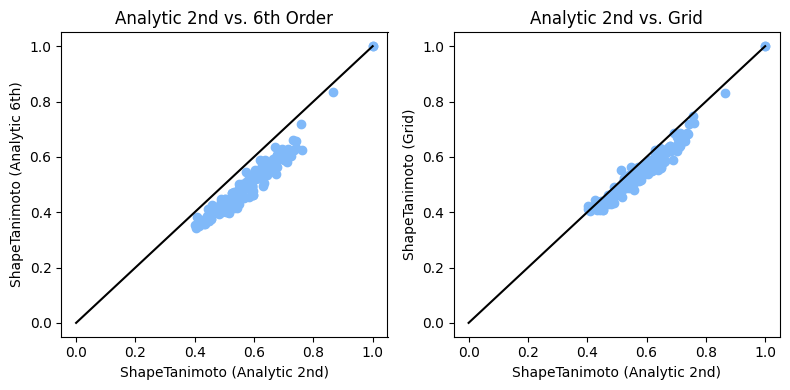

In [8]:
merged_df = pd.merge(df_default, df_sixth, on='Molecule', suffixes=('_Default', '_Sixth'))
merged_df = pd.merge(merged_df, df_grid, on='Molecule')

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(merged_df["ShapeTanimoto_Default"], merged_df["ShapeTanimoto_Sixth"], color="#80B9F9")
axs[0].set_xlabel("ShapeTanimoto (Analytic 2nd)")
axs[0].set_ylabel("ShapeTanimoto (Analytic 6th)")
axs[0].set_title("Analytic 2nd vs. 6th Order")
axs[0].plot([0, 1], [0, 1], color="black")
# Second scatter plot
axs[1].scatter(merged_df["ShapeTanimoto_Default"], merged_df["ShapeTanimoto"], color="#80B9F9")
axs[1].set_xlabel("ShapeTanimoto (Analytic 2nd)")
axs[1].set_ylabel("ShapeTanimoto (Grid)")
axs[1].set_title("Analytic 2nd vs. Grid")
axs[1].plot([0, 1], [0, 1], color="black")

plt.tight_layout()
plt.show()

## Running with a Custom Color Force Field 

In the given function `get_similarity_scores()`, you have the option to specify a different force field definition file using the `fdef_path` parameter. By default, the function uses the BaseFeatures.fdef file from RDKit. However, you can provide a custom JSON file that contains the force field definition.

The force field definition file should be in JSON format and should have keys representing the pharmacophore type and corresponding values as a list of SMARTS definitions or patterns. 

For example, the JSON file could look like this:

```json
{
  "Donor": ["[#16!H0]"],
  "Acceptor": ["[$([O])&!$([OX2](C)C=O)&!$(*(~a)~a)]"],
  "PosIonizable": ["[+,+2,+3,+4]"],
  "NegIonizable": ["[-,-2,-3,-4]"],
  "Aromatic": ["a1aaaaa1", "a1aaaa1"],
  "Hydrophobe": ["[C&r3]1~[C&r3]~[C&r3]1"],   
}
```

Custom JSON files can be found under: roshambo/data directory. For example: 

In [9]:
get_similarity_scores(
    ref_file="query.sdf",
    dataset_files_pattern="dataset.sdf",
    ignore_hs=True,
    n_confs=0,
    use_carbon_radii=True,
    color=True,
    sort_by="ComboTanimoto",
    write_to_file=True,
    gpu_id=0,
    fdef_path="../data/features.json",
    working_dir="data/color",
)

Preparing mols took: 0.4852163791656494
Preparing mols took: 0.8493287563323975
Run time: 0.08354299096390605
Running paper took: 0.11951994895935059
Converting transformation arrays took: 0.002428293228149414
Transforming molecules took: 0.0635061264038086


# Executing PAPER on GPU 0
# Shape overlay optimization used 10 iterations of BFGS


Calculating shape scores took: 0.6596577167510986
Calculating color scores took: 0.6335222721099854
Creating dataframe took: 0.18086671829223633
Writing molecule file took: 0.2169027328491211


### Visualizing the Pharmacophores

To visualize the pharmacophores, we will use the `draw_pharm` function from the `pharmacophore` module in ROSHAMBO. In this section, we will explain how to visualize the features on the query molecule. Please note that we will be performing the visualization process from scratch, which involves reading the molecule, identifying the pharmacophores, and more.

Alternatively, you can choose to visualize the pharmacophores within the `get_similarity_scores` function while running the actual calculations. To do this, simply set the `draw_pharm` parameter to True. However, in this particular context, we will not visualize all the outputs.

<span style="color:red;">It's important to note the following differences between ROSHAMBO and ROCS when it comes to drawing features:</span>

1. ROCS highlights the center of the pharmacophore, whereas ROSHAMBO highlights all the atoms representing the pharmacophore.
2. In ROCS, the alpha value of the color of the pharmacophores on the dataset molecule changes based on its overlap with the pharmacophores on the query molecule. On the other hand, ROSHAMBO treats each molecule independently and highlights all the features on each molecule separately.

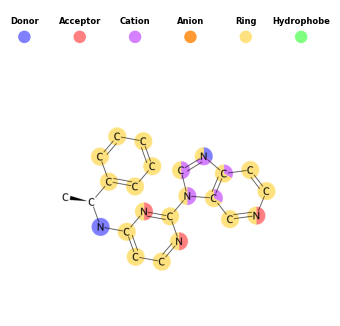

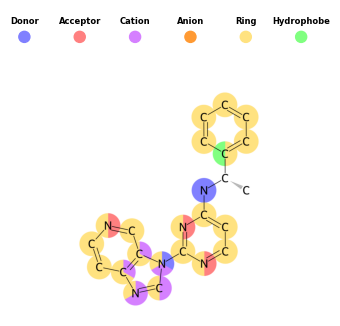

In [11]:
from rdkit import Chem
from roshambo.pharmacophore import draw_pharm, calc_custom_pharm, load_smarts_from_json, calc_rdkit_pharm

compiled_smarts = load_smarts_from_json("../data/features.json")
rdkit_mol = Chem.MolFromMolFile("data/basic_run/query.sdf")
custom_features = calc_custom_pharm(rdkit_mol, compiled_smarts)
rdkit_features = calc_rdkit_pharm(rdkit_mol)
draw_pharm(rdkit_mol, custom_features, working_dir="data/basic_run")
draw_pharm(rdkit_mol, rdkit_features, working_dir="data/basic_run")

## Running with Conformer Generation

Now, let's run a similarity calculation that involves conformer generation, energy calculations, and conformer selection. 

**In the following run, we will do the following**:
1. Generate 10 conformers for each molecule using the "ETKDGv3" method in RDKit.
2. Calculate the energy of the conformers and retain only those with an energy difference less than or equal to 30 kcal/mol from the minimum energy conformer (controlled by the `energy_cutoff` parameter).
3. Retain conformers that are at least 0.1 Angstroms apart from each other (controlled by the `rms_cutoff` parameter).

You can also choose to optimize the conformers by setting `opt_confs` to True, in which case you can optionally set the `ff` parameter to your force field of choice. `ff` defaults to `MMFF94s`.

<span style="color:red;">If `keep_mol` is set to True, the original molecule will be retained in the overlay optimization and score calculations.</span>

`max_conformers` specifies how many conformers of each dataset molecule will be saved in the final sdf and csv files. For example `max_conformers` = 1 will return the best conformer (based on the score specified by `sort_by`). 

In [13]:
get_similarity_scores(
    ref_file="query.sdf",
    dataset_files_pattern="dataset.sdf",
    ignore_hs=True,
    n_confs=10,
    keep_mol=True,
    random_seed=109838974,
    opt_confs=True,
    calc_energy=True,
    energy_iters=300,
    energy_cutoff=30,
    align_confs=True,
    rms_cutoff=0.1,
    num_threads=48,
    method="ETKDGv3",
    volume_type="analytic",
    n=2,
    epsilon=0.5,
    use_carbon_radii=True,
    color=True,
    max_conformers=3,
    sort_by="ComboTanimoto",
    write_to_file=True,
    gpu_id=0,
    fdef_path="../data/features.json",
    working_dir="data/conformers",
)

Preparing mols took: 0.6353604793548584
Preparing mols took: 6.987128496170044


# Executing PAPER on GPU 0
# Shape overlay optimization used 10 iterations of BFGS


Run time: 0.8200431291479617
Running paper took: 1.0259017944335938
Converting transformation arrays took: 0.029053211212158203
Transforming molecules took: 0.6692755222320557
Calculating shape scores took: 2.9752635955810547
Calculating color scores took: 1.923708438873291
Creating dataframe took: 0.17370104789733887
Writing molecule file took: 0.4825108051300049


In [2]:
df_conformers = pd.read_csv("data/conformers/roshambo.csv", delimiter="\t")
df_conformers.head(10)

,Molecule,OriginalName,ComboTanimoto,ShapeTanimoto,ColorTanimoto,FitTverskyCombo,FitTversky,FitColorTversky,RefTverskyCombo,RefTversky,RefColorTversky,Overlap
0,CHEMBL221029_0,CHEMBL221029,2.000,1.000,1.000,2.000,1.000,1.000,2.000,1.000,1.000,1169.784
1,CHEMBL220585_0,CHEMBL220585,1.705,1.000,0.705,1.883,1.000,0.883,1.778,1.000,0.778,1169.540
2,CHEMBL222027_0_9,CHEMBL222027,1.565,0.771,0.794,1.646,0.803,0.843,1.883,0.951,0.932,1123.398
3,CHEMBL375076_0_8,CHEMBL375076,1.485,0.805,0.680,1.706,0.896,0.810,1.697,0.887,0.809,1037.446
4,CHEMBL375076_0_9,CHEMBL375076,1.485,0.805,0.680,1.706,0.896,0.810,1.697,0.887,0.809,1037.446
5,CHEMBL375076_0_7,CHEMBL375076,1.485,0.805,0.680,1.706,0.896,0.810,1.697,0.887,0.809,1037.445
6,CHEMBL557844_0,CHEMBL557844,1.466,0.758,0.709,1.624,0.835,0.789,1.765,0.891,0.874,1046.460
7,CHEMBL221029_0_4,CHEMBL221029,1.449,0.768,0.682,1.684,0.873,0.811,1.675,0.864,0.810,1010.495
8,CHEMBL221029_0_5,CHEMBL221029,1.422,0.767,0.654,1.664,0.873,0.791,1.655,0.864,0.791,1010.137
9,CHEMBL557844_0_9,CHEMBL557844,1.420,0.735,0.685,1.596,0.822,0.774,1.730,0.874,0.856,1025.487


## Running with SMILES input

When using the `get_similarity_scores` function with .smi input files, the calculation process remains the same as before. However, you can optionally include an additional parameter called `smiles_kwargs` to customize the parameters passed to the `rdkit.Chem.rdmolfiles.SmilesMolSupplier` function when reading molecules from the .smi file.

<span style="color:red;">Note that sometimes you need to provide the delimiter used to separate the SMILES from the molecule name on each line of the file. The default used in RDKit is space. </span>

Like before, the `dataset_files_pattern` parameter allows you to specify a file pattern corresponding to multiple files. This enables reading and processing multiple dataset files together.

In [15]:
get_similarity_scores(
    ref_file="query.sdf",
    dataset_files_pattern="dataset.smi",
    ignore_hs=True,
    n_confs=100,
    keep_mol=True,
    random_seed=109838974,
    opt_confs=False,
    calc_energy=False,
    energy_iters=300,
    energy_cutoff=30,
    align_confs=True,
    rms_cutoff=0.1,
    num_threads=48,
    method="ETKDGv3",
    volume_type="analytic",
    n=2,
    epsilon=0.5,
    use_carbon_radii=True,
    color=True,
    max_conformers=1,
    sort_by="ComboTanimoto",
    write_to_file=True,
    gpu_id=0,
    fdef_path="../data/features.json",
    working_dir="data/smiles",
    #smiles_kwargs={"delimiter": "\t"},
)

Preparing mols took: 0.7570054531097412
Preparing mols took: 15.808820962905884


# Executing PAPER on GPU 0
# Shape overlay optimization used 10 iterations of BFGS


Run time: 0.47548187407664955
Running paper took: 1.185603380203247
Converting transformation arrays took: 0.18064665794372559
Transforming molecules took: 3.3388750553131104
Calculating shape scores took: 10.02515459060669
Calculating color scores took: 6.905524253845215
Creating dataframe took: 0.17230749130249023
Writing molecule file took: 0.21876978874206543


## ROC Analysis 


We will now explore the analysis capabilities provided by ROSHAMBO. The analysis includes:
1. Calculating the Receiver Operating Characteristic (ROC) curve
2. Determining the Area Under the Curve (AUC) value
3. Calculating the Enrichment Factor at different rates

These calculations are performed using bootstrapping techniques to obtain statistical measures such as mean and 95% confidence intervals. 

ROSHAMBO also allows plotting the following:
1. Distribution of scores from a dataset (e.g. obtained from ROSHAMBO or other methods)
2. ROC curves in both normal and semi-log formats, allowing for easy comparison between different outputs such as ROCS and ROSHAMBO
3. AUC bar plots, grouping datasets by method (e.g. to compare between ROSHAMBO and other methods) 
4. Stacked enrichment bar plots can be, again grouping datasets by method 

This kind of analysis/visualization can be performed via the `analysis` module. 

### Score Distributions

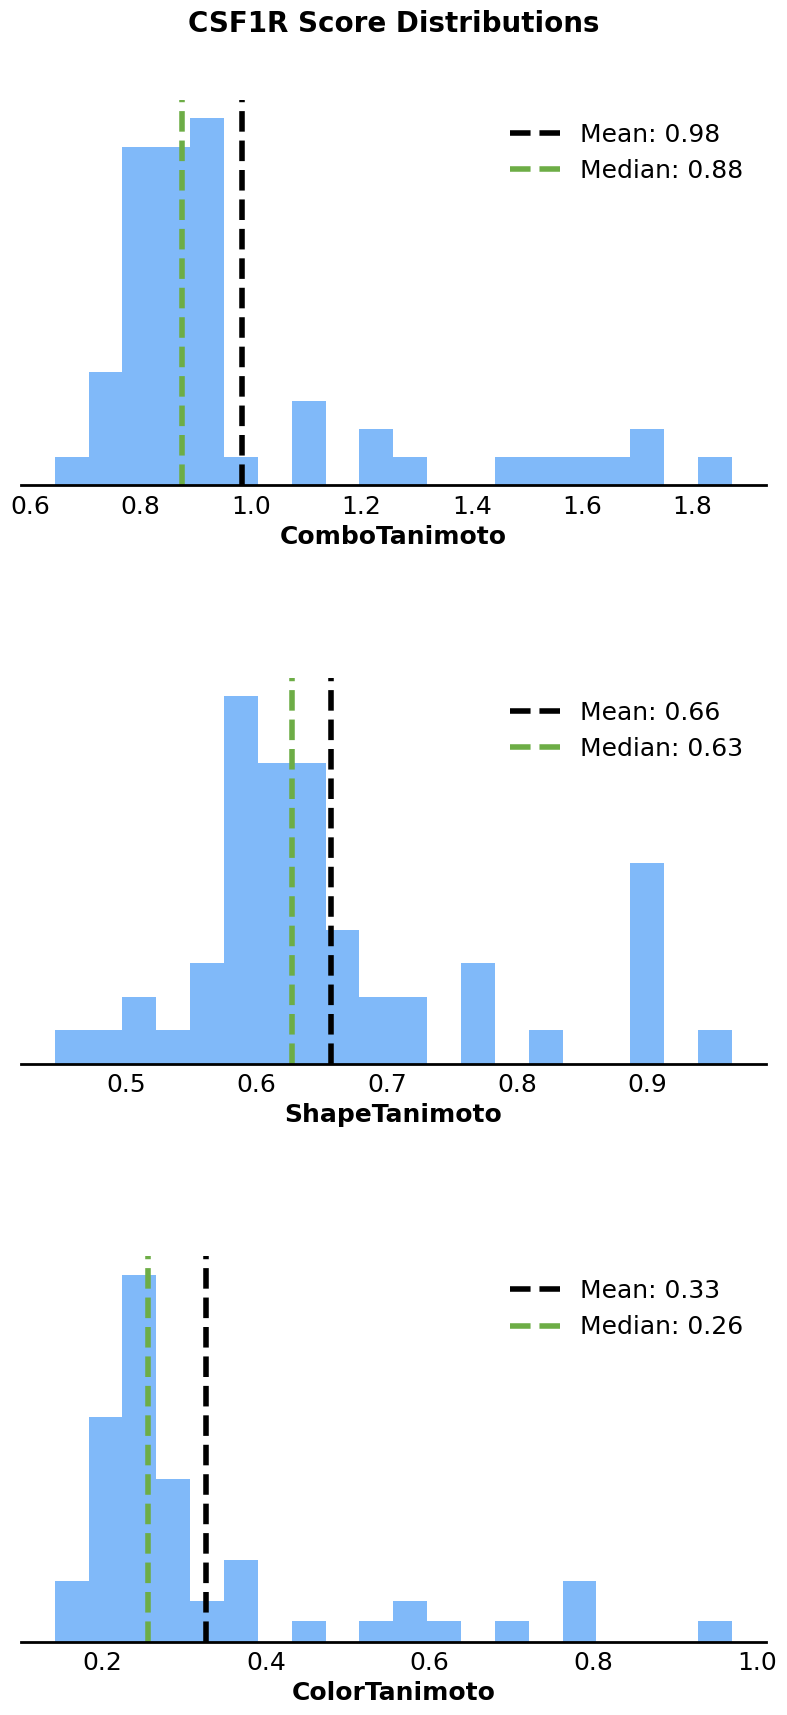

In [16]:
from roshambo.analysis import plot_scores_dist

working_dir = "data/analysis"
df = pd.read_csv(f"{working_dir}/roshambo_ligands_CSF1R.csv", delimiter="\t")
plot_scores_dist(
    df,
    columns=["ComboTanimoto", "ShapeTanimoto", "ColorTanimoto"],
    title="CSF1R Score Distributions",
    working_dir=working_dir,
)

### ROC Curves

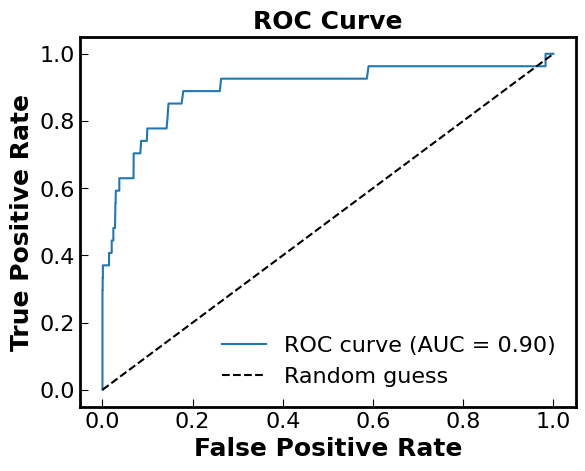

In [17]:
from roshambo.analysis import calc_roc_auc

auc, roce, fig = calc_roc_auc(
    f"{working_dir}/roshambo_ligands_CXCR4.csv",
    f"{working_dir}/roshambo_decoys_CXCR4.csv",
    score="ComboTanimoto",
    n_bootstraps=1000,
    interpolation=True,
    eevs=[0.005, 0.01, 0.02, 0.05],
    plot=True,
    log=False,
    working_dir=working_dir,
)
shutil.move(f"{working_dir}/roc.csv", f"{working_dir}/roshambo_roc_CXCR4.csv")
shutil.move(f"{working_dir}/analysis.csv", f"{working_dir}/roshambo_analysis_CXCR4.csv")

fig

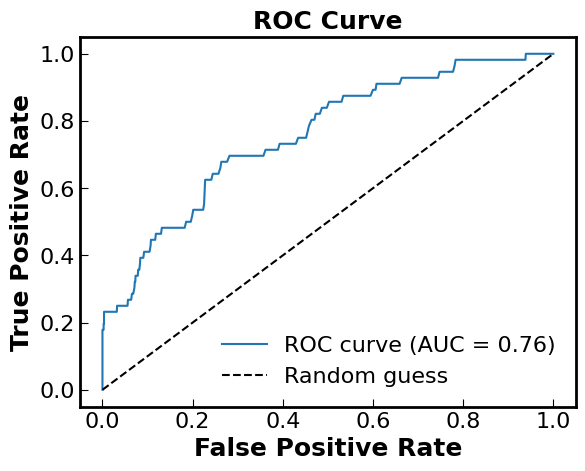

In [18]:
auc, roce, fig = calc_roc_auc(
    f"{working_dir}/roshambo_ligands_CSF1R.csv",
    f"{working_dir}/roshambo_decoys_CSF1R.csv",
    score="ComboTanimoto",
    n_bootstraps=1000,
    interpolation=True,
    eevs=[0.005, 0.01, 0.02, 0.05],
    plot=True,
    log=False,
    working_dir=working_dir,
)

shutil.move(f"{working_dir}/roc.csv", f"{working_dir}/roshambo_roc_CSF1R.csv")
shutil.move(f"{working_dir}/analysis.csv", f"{working_dir}/roshambo_analysis_CSF1R.csv")

fig

### Multiple ROC Curves

In [ ]:
from roshambo.analysis import plot_mult_roc

fig_cxcr4_csf1r = plot_mult_roc(
    rates_dict={
        "CXCR4": f"{working_dir}/roshambo_roc_CXCR4.csv",
        "CSF1R": f"{working_dir}/roshambo_roc_CSF1R.csv"
    },
    analysis_dict={
        "CXCR4": f"{working_dir}/roshambo_analysis_CXCR4.csv", "CSF1R": f"{working_dir}/roshambo_analysis_CSF1R.csv"},
    colors_dict={"CXCR4": "#80B9F9", "CSF1R": "#6DAD46"},
    title="CXCR4 vs. CSF1R",
    log=False,
    filename="CXCR4_CSF1R.jpg",
    working_dir=working_dir,
)

fig_cxcr4_csf1r

### AUC Plot
The following function `plot_mult_auc` allows you to plot the AUC values obtained from the ROC analysis from different software for comparison. Here, only ROSHAMBO is used for demonstration purposes but you can include other software as well as shown in the commented part of the code.

In [ ]:
from roshambo.analysis import plot_mult_auc

fig = plot_mult_auc(
    auc_dict={
        "ROSHAMBO": [
            f"{working_dir}/roshambo_analysis_CSF1R.csv",
            f"{working_dir}/roshambo_analysis_CXCR4.csv",
        ],
        # "Other_Software": [
        #     f"{working_dir}/software_analysis_CSF1R.csv",
        #     f"{working_dir}/software_analysis_CXCR4.csv",
        # ],
    },
    colors_dict={"ROSHAMBO": "#80B9F9"},
    # colors_dict={"ROSHAMBO": "#80B9F9", "Software": "#6DAD46"},
    group_labels=["CSF1R", "CXCR4"],
    working_dir=working_dir,
)

fig

### Enrichment Factors Plot
The following function `plot_mult_enrichment` allows you to plot the enrichment factors obtained from different software for comparison. Here, only ROSHAMBO is used for demonstration purposes but you can include other software as well as shown in the commented part of the code. The bars will be grouped by the software used.

In [ ]:
from roshambo.analysis import plot_mult_enrichment

fig_enrich = plot_mult_enrichment(
    enrich_dict={
        "ROSHAMBO": [
            f"{working_dir}/roshambo_analysis_CSF1R.csv",
            f"{working_dir}/roshambo_analysis_CXCR4.csv",
        ],
        # "Other_Software": [
        #     f"{working_dir}/software_analysis_CSF1R.csv",
        #     f"{working_dir}/software_analysis_CXCR4.csv",
        # ],
    },
    colors_dict={0: "#80B9F9", 1: "#6DAD46", 2: "gray", 3: "black"},
    hatch_patterns=[None, "+"],
    group_labels=["CSF1R", "CXCR4"],
    working_dir=working_dir,
)

fig_enrich